In [2]:
# NEED TO USE TADA_V2 kernel to be able to load the modles
import numpy as np
import pandas as pd
import tensorflow as tf # tested on version 2.2.0
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['font.sans-serif'] = 'Arial'
from matplotlib import pyplot as plt
from joblib import load
from scipy.stats import spearmanr
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec


import os

In [8]:
all_results[" activity_fun"]

0         Hill
1         Hill
2         Hill
3         Hill
4         Hill
         ...  
2031    Linear
2032    Linear
2033    Linear
2034    Linear
2035    Linear
Name:  activity_fun, Length: 2036, dtype: object

In [15]:
data_two_state_linear.columns

Index(['model_name', ' model_type', ' kernel_size', ' activity_fun',
       ' negative_pen', ' weight_pen', ' activity_weight', ' hill_value',
       ' Rsq_abund_val', 'Rs1_act_val', ' Rsq_abund_train', ' Rsq_act_train',
       ' pearson_abund_val', ' pearson_act_val', ' pearson_abund_train',
       ' pearson_act_train', 'K1_negative', 'K2_negative', ' abund_negative',
       ' relu', ' total_params', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'abund_kernel_size'],
      dtype='object')

Text(0.5, 1.0, 'Three state biophysical NN')

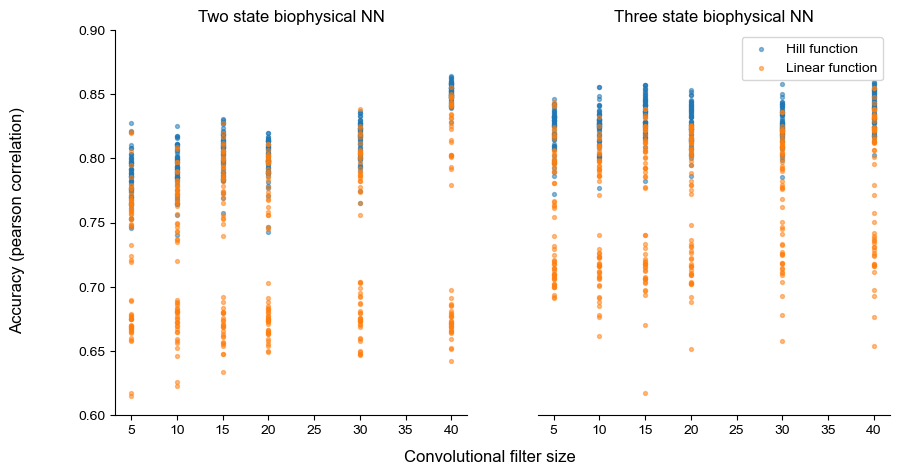

In [36]:
import re
# data_two_state = pd.read_csv("../results/results_2_state_w0.5_repeats.csv")
# data_three_state = pd.read_csv("../results/results_3_state_repeats.csv")

data_two_state = pd.read_csv("../../results/results_two_state_test_larger_LR.csv")
data_three_state = pd.read_csv("../../results/results_three_state_abund_test_larger_LR.csv")

# all_results = pd.read_csv("../../results/results.csv")
data_two_state_linear = data_two_state[(data_two_state["activity_fun"] == "Linear") & (data_two_state["model_type"] == "two_state_abund")]
data_three_state_linear = data_three_state[(data_three_state["activity_fun"] == "Linear") & (data_three_state["model_type"] == "three_state_abund")]

data_two_state_hill = data_two_state[(data_two_state["activity_fun"] == "Hill") & (data_two_state["model_type"] == "two_state_abund")]
data_three_state_hill = data_three_state[(data_three_state["activity_fun"] == "Hill") & (data_three_state["model_type"] == "three_state_abund")]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharex=True, sharey=True)

axs[0].scatter(data_two_state_hill["kernel_size"], data_two_state_hill["pearson_act_test"], label="Hill function", s=8, alpha=0.5)
axs[1].scatter(data_three_state_hill["kernel_size"], data_three_state_hill["pearson_act_test"], label="Hill function", s=8, alpha=0.5)

axs[0].scatter(data_two_state_linear["kernel_size"], data_two_state_linear["pearson_act_test"], label="Linear function", s=8, alpha=0.5)
axs[1].scatter(data_three_state_linear["kernel_size"], data_three_state_linear["pearson_act_test"], label="Linear function", s=8, alpha=0.5)


fig.supxlabel("Convolutional filter size")
fig.supylabel("Accuracy (pearson correlation)")

plt.legend()
plt.ylim(0.6, 0.9)

axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)

axs[1].yaxis.set_tick_params(size=0)

axs[0].set_title("Two state biophysical NN")
axs[1].set_title("Three state biophysical NN")

Text(0.5, 1.0, 'Three state biophysical NN')

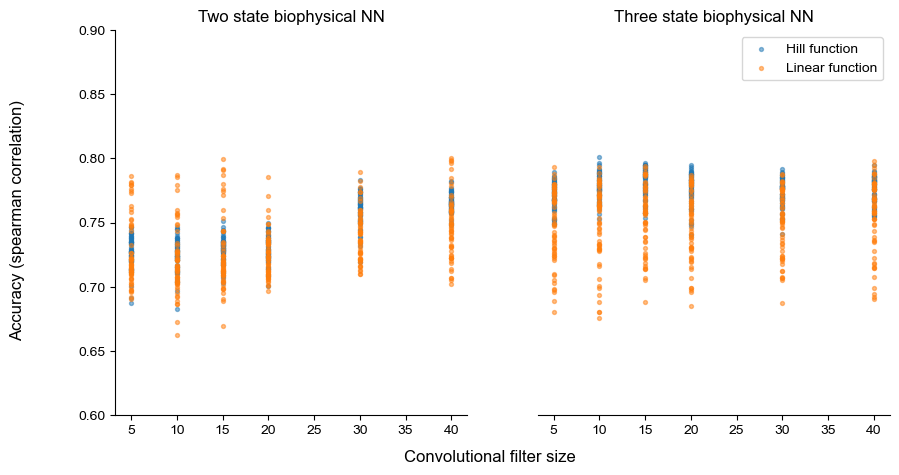

In [38]:
import re
# data_two_state = pd.read_csv("../results/results_2_state_w0.5_repeats.csv")
# data_three_state = pd.read_csv("../results/results_3_state_repeats.csv")

data_two_state = pd.read_csv("../../results/results_two_state_test_larger_LR.csv")
data_three_state = pd.read_csv("../../results/results_three_state_abund_test_larger_LR.csv")

# all_results = pd.read_csv("../../results/results.csv")
data_two_state_linear = data_two_state[(data_two_state["activity_fun"] == "Linear") & (data_two_state["model_type"] == "two_state_abund")]
data_three_state_linear = data_three_state[(data_three_state["activity_fun"] == "Linear") & (data_three_state["model_type"] == "three_state_abund")]

data_two_state_hill = data_two_state[(data_two_state["activity_fun"] == "Hill") & (data_two_state["model_type"] == "two_state_abund")]
data_three_state_hill = data_three_state[(data_three_state["activity_fun"] == "Hill") & (data_three_state["model_type"] == "three_state_abund")]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharex=True, sharey=True)

axs[0].scatter(data_two_state_hill["kernel_size"], data_two_state_hill["spearman_act_test"], label="Hill function", s=8, alpha=0.5)
axs[1].scatter(data_three_state_hill["kernel_size"], data_three_state_hill["spearman_act_test"], label="Hill function", s=8, alpha=0.5)

axs[0].scatter(data_two_state_linear["kernel_size"], data_two_state_linear["spearman_act_test"], label="Linear function", s=8, alpha=0.5)
axs[1].scatter(data_three_state_linear["kernel_size"], data_three_state_linear["spearman_act_test"], label="Linear function", s=8, alpha=0.5)


fig.supxlabel("Convolutional filter size")
fig.supylabel("Accuracy (spearman correlation)")

plt.legend()
plt.ylim(0.6, 0.9)

axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)

axs[1].yaxis.set_tick_params(size=0)

axs[0].set_title("Two state biophysical NN")
axs[1].set_title("Three state biophysical NN")

In [31]:
data_two_state_linear[(data_two_state_linear["kernel_size"] == 40) & (data_two_state_linear["pearson_act_test"] < 0.71)]['model_name']

5      ../../model_data/two_state_abundmodel_b10_e200...
17     ../../model_data/two_state_abundmodel_b10_e200...
29     ../../model_data/two_state_abundmodel_b10_e200...
41     ../../model_data/two_state_abundmodel_b10_e200...
47     ../../model_data/two_state_abundmodel_b10_e200...
53     ../../model_data/two_state_abundmodel_b10_e200...
59     ../../model_data/two_state_abundmodel_b10_e200...
71     ../../model_data/two_state_abundmodel_b10_e200...
83     ../../model_data/two_state_abundmodel_b10_e200...
89     ../../model_data/two_state_abundmodel_b10_e200...
101    ../../model_data/two_state_abundmodel_b10_e200...
113    ../../model_data/two_state_abundmodel_b10_e200...
119    ../../model_data/two_state_abundmodel_b10_e200...
131    ../../model_data/two_state_abundmodel_b10_e200...
143    ../../model_data/two_state_abundmodel_b10_e200...
149    ../../model_data/two_state_abundmodel_b10_e200...
167    ../../model_data/two_state_abundmodel_b10_e200...
185    ../../model_data/two_sta

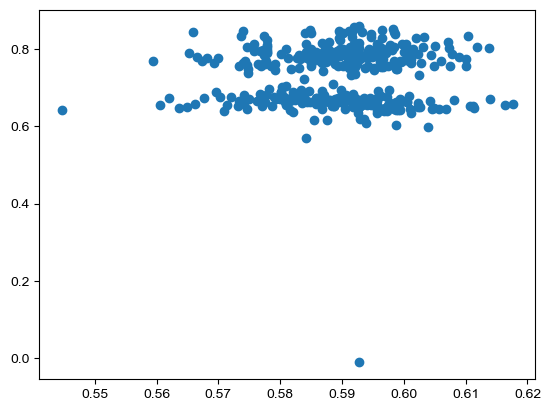

In [25]:
plt.scatter(data_two_state['pearson_abund_val'], data_two_state['pearson_act_val'])